In [1]:
from wordle1 import wordle_blitz
import shelve
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

shelfFile = shelve.open('five_words')
five_words1 = shelfFile['five_words2']
database = shelfFile['blank_db']
print(len(five_words1))


4738


In [2]:
db = wordle_blitz('brick','stomp','nudge', 10000, five_words1)

       Number Wrong  Percent Missed  Round 1  Round 2  Round 3  Round 4  \
Word                                                                      
aback             0             0.0        0        0        0        0   
abaft             0             0.0        0        0        0        0   
abase             0             0.0        0        0        0        0   
abash             0             0.0        0        0        0        0   
abate             0             0.0        0        0        0        0   

       Round 5  Round 6 Guesses Pattern  
Word                                     
aback        0        0      []      []  
abaft        0        0      []      []  
abase        0        0      []      []  
abash        0        0      []      []  
abate        0        0      []      []  
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
lends
['brick', 'stomp', 'nudge', 'danes', 'vends', 'fends']
1800
1900
2000
2100
2200
2300
2400
2500
2

In [3]:
two_letters = []
for word in db.index.values:
    pair = [word, False]
    for letter in word:
        if word.count(letter) > 1:
            pair[1] = True
    two_letters.append(pair[1])
    

In [4]:
db['Two Letters'] = two_letters

In [5]:
db_wrong = db[db['Number Wrong'] >0]

In [6]:
db_wrong.head()

,Number Wrong,Percent Missed,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Guesses,Pattern,Two Letters
Word,,,,,,,,,,,
after,26,12.3188,0,0,0,0,0,0,[],[],False
aging,37,17.5306,0,0,0,0,0,0,[],"[[b, b, g, b, b, b, b, b, b, b, y, b, b, y, b]...",True
ailed,56,26.5328,0,0,0,0,0,0,[],[],False
aired,80,37.9040,0,0,0,0,0,0,[],"[[b, y, y, b, b, b, b, b, b, b, b, b, y, b, y]...",False
aires,97,45.9586,0,0,0,0,0,0,[],"[[b, y, y, b, b, y, b, b, b, b, b, b, b, b, y]...",False


In [7]:
word_to_wrong_map = dict(zip(db_wrong.index.values, db_wrong['Number Wrong']))

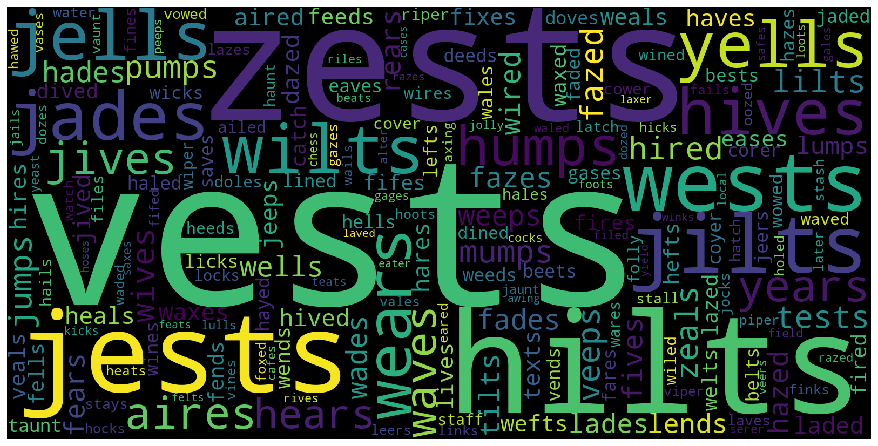

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tupl = dict(word_to_wrong_map.items())
word_cloud = WordCloud(width=1600,height=800,).generate_from_frequencies(tupl)
plt.figure(figsize = (12,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [9]:
alph = 'abcdefghijklmnopqrstuvwxyz'

a_list = []
for let in alph:
    a_list.append(let)

count_list = []

for letter in alph:
    letter_count = 0
    for word in db_wrong.index.values:
        if letter in word:
            letter_count +=1
    count_list.append(letter_count)

In [10]:
df_letters = pd.DataFrame()
df_letters['Letter'] = a_list
df_letters['Count'] = count_list
df_letters = df_letters.sort_values(by = ['Count'], ascending = False)

Text(0, 0.5, 'Percent Wrong')

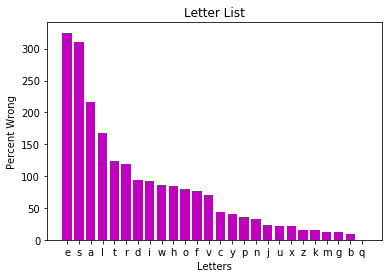

In [11]:
plt.bar(x = df_letters['Letter'], height = df_letters['Count'], color = ['m'])
plt.title("Letter List")
plt.xlabel('Letters')
plt.ylabel("Percent Wrong")

Percent wrong with two letters vs percent wrong total

percent of five letter words where 2 letters are the same

In [12]:
pertwotot = db[db['Two Letters'] == True].shape[0]/db.shape[0]

In [13]:
pertwowr = db_wrong[db_wrong['Two Letters'] == True].shape[0]/db_wrong.shape[0]

In [14]:
df_tl = pd.DataFrame()
df_tl['Name'] = ['Percent with two letters total', 'Percent with two letters wrong']
df_tl['Percent Wrong'] = [pertwotot, pertwowr]


Text(0, 0.5, 'Percent of total words')

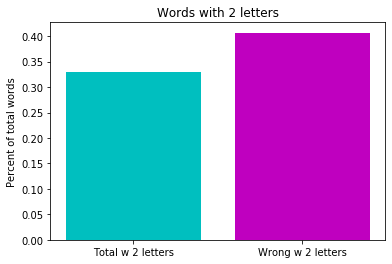

In [15]:
plt.bar(x = ['Total w 2 letters', 'Wrong w 2 letters'], height = df_tl['Percent Wrong'], color = ['c','m'])
plt.title("Words with 2 letters")
plt.ylabel("Percent of total words")

words that end in 's'

Total words ending in 's': 0.3224989447024061
Wrong words ending in 's': 0.588865096359743


Text(0, 0.5, 'Percent of total words')

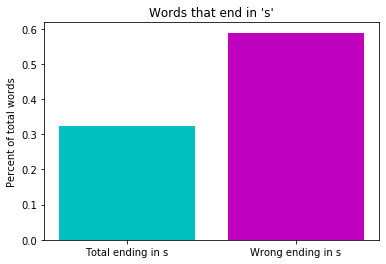

In [16]:
swords1 = 0

for word in db.index.values:
        if word[4] == 's':
            swords1 +=1

swords2 = 0

for word in db_wrong.index.values:
        if word[4] == 's':
            swords2 +=1
ends_tot = swords1/len(db.index.values)
ends_wr = swords2/len(db_wrong.index.values)

print("Total words ending in 's': " + str(ends_tot))
print("Wrong words ending in 's': " + str(ends_wr))
plt.bar(x = ['Total ending in s', 'Wrong ending in s'], height = [ends_tot, ends_wr], color = ['c','m'])
plt.title("Words that end in 's'")
plt.ylabel("Percent of total words")

vowel placement

In [17]:
a_list = [0,0,0,0,0]
e_list = [0,0,0,0,0]
i_list = [0,0,0,0,0]
o_list = [0,0,0,0,0]
u_list = [0,0,0,0,0]


for word in db.index.values:
    for i in range(0,5):
        if word[i] == 'a':
            a_list[i] +=1
        if word[i] == 'e':
            e_list[i] +=1
        if word[i] == 'i':
            i_list[i] +=1
        if word[i] == 'o':
            o_list[i] +=1
        if word[i] == 'u':
            u_list[i] +=1

print(a_list)
print(e_list)
print(i_list)
print(o_list)
print(u_list)

[251, 779, 542, 285, 129]
[113, 543, 334, 1010, 539]
[64, 531, 469, 248, 28]
[87, 722, 403, 210, 92]
[48, 420, 278, 126, 7]


In [18]:
vow_list = [0,0,0,0,0]

for i in range(0,5):
    vow_list[i] = a_list[i] + e_list[i] + i_list[i] + o_list[i] + u_list[i]  
    
print(vow_list)

[563, 2995, 2026, 1879, 795]


This actually gives no useful info. Let me try again.

most common vowel distributions.

In [19]:
vdist_list = []
for word in db.index.values:
    vowel_list = ['_','_','_','_','_']
    for i in range(0,5):
        if word[i] in 'aeiou':
            vowel_list[i] = word[i]
    vowel_list = ''.join(vowel_list)
    vdist_list.append(vowel_list)
    

In [20]:
vd_set = set(vdist_list)
vd_count = []
for i in vd_set:
    vd_count.append(vdist_list.count(i))

In [21]:
vd_count

[4,
 3,
 2,
 1,
 2,
 1,
 5,
 2,
 45,
 7,
 1,
 22,
 12,
 44,
 34,
 1,
 1,
 17,
 1,
 3,
 2,
 1,
 1,
 2,
 1,
 5,
 18,
 1,
 1,
 2,
 1,
 7,
 10,
 2,
 2,
 1,
 18,
 1,
 2,
 3,
 1,
 9,
 1,
 25,
 1,
 1,
 5,
 68,
 15,
 2,
 24,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 20,
 1,
 1,
 3,
 5,
 1,
 231,
 1,
 1,
 1,
 1,
 1,
 216,
 1,
 18,
 1,
 1,
 1,
 1,
 11,
 42,
 1,
 1,
 3,
 8,
 1,
 1,
 2,
 36,
 14,
 1,
 4,
 1,
 179,
 1,
 7,
 1,
 7,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 10,
 2,
 1,
 4,
 16,
 46,
 3,
 87,
 1,
 3,
 1,
 3,
 1,
 52,
 1,
 2,
 1,
 1,
 9,
 1,
 12,
 16,
 14,
 8,
 1,
 4,
 1,
 19,
 1,
 35,
 2,
 11,
 1,
 12,
 1,
 1,
 17,
 2,
 1,
 5,
 125,
 1,
 8,
 1,
 1,
 1,
 1,
 2,
 60,
 5,
 1,
 49,
 1,
 4,
 3,
 4,
 10,
 3,
 1,
 189,
 1,
 3,
 10,
 1,
 1,
 1,
 1,
 1,
 3,
 40,
 2,
 2,
 1,
 37,
 2,
 6,
 1,
 11,
 61,
 43,
 1,
 5,
 121,
 3,
 3,
 8,
 3,
 1,
 6,
 4,
 5,
 4,
 12,
 1,
 4,
 1,
 1,
 12,
 1,
 4,
 2,
 4,
 18,
 1,
 1,
 2,
 10,
 1,
 8,
 2,
 1,
 1,
 6,
 1,
 2,
 2,
 149,
 3,
 2,
 2,
 10,
 5,
 2,
 2,
 3,
 2,
 1,


In [22]:
vow_dist_map = dict(zip(vd_set, vd_count))

In [23]:
list = []
for key, value in vow_dist_map.items():
  list.append([key, value]) 

In [24]:
print(len(two_letters))

4738


In [25]:
vow_df = pd.DataFrame(list, columns=['Vowel Dist', 'Counts'])
vow_df.head()

,Vowel Dist,Counts
0,_o_ie,4
1,i____,3
2,a_ie_,2
3,a__ee,1
4,_io_e,2


In [26]:
vow_df = vow_df.sort_values('Counts', ascending = False)
vow_df_shrink = vow_df.iloc[:10,:]
print()

In [27]:
vow_df_shrink['Counts'].sum()

1807

Text(0, 0.5, 'Percent of total words')

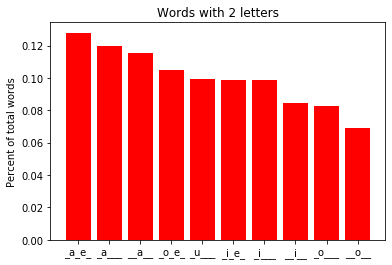

In [28]:
plt.bar(x = vow_df_shrink['Vowel Dist'], height = vow_df_shrink['Counts']/vow_df_shrink['Counts'].sum(), color = ['r'])
plt.title("Words with 2 letters")
plt.ylabel("Percent of total words")

In [29]:
vow_df_shrink[vow_df_shrink['Vowel Dist'] == '_ee__']

,Vowel Dist,Counts


[17, 141, 46, 11, 3]
[11, 101, 44, 216, 3]
[0, 75, 16, 2, 1]
[3, 73, 9, 2, 0]
[0, 17, 4, 0, 0]
[31, 407, 119, 231, 7]
4738



Text(0, 0.5, 'Percent of total words')

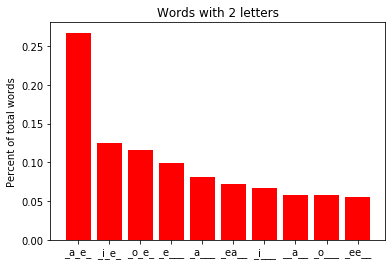

In [30]:
a_list = [0,0,0,0,0]
e_list = [0,0,0,0,0]
i_list = [0,0,0,0,0]
o_list = [0,0,0,0,0]
u_list = [0,0,0,0,0]


for word in db_wrong.index.values:
    for i in range(0,5):
        if word[i] == 'a':
            a_list[i] +=1
        if word[i] == 'e':
            e_list[i] +=1
        if word[i] == 'i':
            i_list[i] +=1
        if word[i] == 'o':
            o_list[i] +=1
        if word[i] == 'u':
            u_list[i] +=1

print(a_list)
print(e_list)
print(i_list)
print(o_list)
print(u_list)

vow_list = [0,0,0,0,0]

for i in range(0,5):
    vow_list[i] = a_list[i] + e_list[i] + i_list[i] + o_list[i] + u_list[i]  
    
print(vow_list)

#This actually gives no useful info. Let me try again.

#most common vowel distributions.

vdist_list = []
for word in db_wrong.index.values:
    vowel_list = ['_','_','_','_','_']
    for i in range(0,5):
        if word[i] in 'aeiou':
            vowel_list[i] = word[i]
    vowel_list = ''.join(vowel_list)
    vdist_list.append(vowel_list)
    

vd_set = set(vdist_list)
vd_count = []
for i in vd_set:
    vd_count.append(vdist_list.count(i))

vd_count

vow_dist_map = dict(zip(vd_set, vd_count))

list = []
for key, value in vow_dist_map.items():
  list.append([key, value]) 

print(len(two_letters))

vow_df = pd.DataFrame(list, columns=['Vowel Dist', 'Counts'])
vow_df.head()

vow_df = vow_df.sort_values('Counts', ascending = False)
vow_df_shrink = vow_df.iloc[:10,:]
print()

plt.bar(x = vow_df_shrink['Vowel Dist'], height = vow_df_shrink['Counts']/vow_df_shrink['Counts'].sum(), color = ['r'])
plt.title("Words with 2 letters")
plt.ylabel("Percent of total words")

In [31]:
db_wrong.loc[:,'Number Wrong']

Word
after     26
aging     37
ailed     56
aired     80
aires     97
        ... 
yeses      3
yield     38
yurts      3
zeals     91
zests    125
Name: Number Wrong, Length: 467, dtype: int64

In [32]:
pattern_brick = {}
pattern_stomp = {}
pattern_nudge = {}
for word, row in db.iterrows():
    pattern1 = []
    pattern2 = []
    pattern3 = []
    for i in range(0,5):
        if word[i] == 'brick'[i]:
            pattern1.append('g')
        elif 'brick'[i] in word:
            pattern1.append('y')
        else:
            pattern1.append('b')
    for i in range(0,5):
        if word[i] == 'stomp'[i]:
            pattern2.append('g')
        elif 'stomp'[i] in word:
            pattern2.append('y')
        else:
            pattern2.append('b')
    for i in range(0,5):
        if word[i] == 'nudge'[i]:
            pattern3.append('g')
        elif 'nudge'[i] in word:
            pattern3.append('y')
        else:
            pattern3.append('b')
    pattern_brick[word] = "".join(pattern1)
    pattern_stomp[word] = "".join(pattern2)
    pattern_nudge[word] = "".join(pattern3)
    


In [33]:
brick = []
for key in pattern_brick:
    brick.append(pattern_brick[key])
    
stomp = []
for key in pattern_stomp:
    stomp.append(pattern_stomp[key])
    
nudge = []
for key in pattern_nudge:
    nudge.append(pattern_nudge[key])


In [34]:
db['Brick'] = brick
db['Stomp'] = stomp
db['Nudge'] = nudge


In [35]:
def num_of_patterns(database, word):
    pattern_list = []
    for i in database[word]:
        pattern_list.append(i)
    pattern_set = set()
    for i in pattern_list:
        pattern_set.add(i)
    pattern_set

In [36]:
num_of_patterns(db, 'Brick')

In [37]:
db_wrong = db[db['Number Wrong'] > 0]

In [38]:
num_of_patterns(db_wrong, 'Brick')

In [39]:
num_of_patterns(db, 'Stomp')

In [40]:
num_of_patterns(db_wrong, 'Stomp')

In [41]:
num_of_patterns(db, 'Nudge')

In [42]:
nudge_patterns = num_of_patterns(db_wrong, 'Nudge')

In [43]:
nudge_patterns

Ok, so it looks like there are 98 possible layouts for the pattern returned on the first word. Only 13 of those patterns lead to a possible error.


How many words are in one of the init patterns that can lead to a wrong answer, but never do lead to a wrong answer?

In [44]:
db_new = db[db['Number Wrong'] == 0]

In [45]:
db_new = db[db['Nudge'].isin(['bbbyy', 'yybbb', 'bbbbg', 'bbbby', 'ybyby', 'bgbby', 'ybbyb', 'bbbyb', 'bgbbb', 'ybbby', 'ybbbb', 'bbybb', 'bbgby', 'bbyby'])]

In [46]:
db_new.shape

(2587, 14)

In [47]:
db_new1 = db[~db['Nudge'].isin(['bbbyy', 'yybbb', 'bbbbg', 'bbbby', 'ybyby', 'bgbby', 'ybbyb', 'bbbyb', 'bgbbb', 'ybbby', 'ybbbb', 'bbybb', 'bbgby', 'bbyby'])]

In [48]:
db_new1.shape

(2151, 14)

In [49]:
db_nudge = db[(db['Number Wrong'] > 0) & (db['Nudge'] == 'bbbyy')]

In [50]:
for i in db_wrong

SyntaxError: invalid syntax (<ipython-input-50-9ca9b628189b>, line 1)

In [51]:
db[db['Nudge'] == 'bbbyy']

,Number Wrong,Percent Missed,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Guesses,Pattern,Two Letters,Brick,Stomp,Nudge
Word,,,,,,,,,,,,,,
aegis,0,0.0000,0,0,0,0,0,0,[],[],False,bbybb,ybbbb,bbbyy
bagel,0,0.0000,0,0,0,0,0,0,[],[],False,gbbbb,bbbbb,bbbyy
befog,0,0.0000,0,0,0,0,0,0,[],[],False,gbbbb,bbybb,bbbyy
begat,0,0.0000,0,0,0,0,0,0,[],[],False,gbbbb,bybbb,bbbyy
beget,0,0.0000,0,0,0,0,0,0,[],[],True,gbbbb,bybbb,bbbyy
begot,0,0.0000,0,0,0,0,0,0,[],[],False,gbbbb,byybb,bbbyy
bogey,0,0.0000,0,0,0,0,0,0,[],[],False,gbbbb,bbybb,bbbyy
cages,0,0.0000,0,0,0,0,0,0,[],[],False,bbbyb,ybbbb,bbbyy
cagey,0,0.0000,0,0,0,0,0,0,[],[],False,bbbyb,bbbbb,bbbyy


In [52]:
wl = []
for i in db[db['Nudge'] == 'bbbyy'].index:
    wl.append(i)

In [53]:
db = wordle_blitz('brick','stomp','nudge', 10000, wl)

       Number Wrong  Percent Missed  Round 1  Round 2  Round 3  Round 4  \
Word                                                                      
aback             0             0.0        0        0        0        0   
abaft             0             0.0        0        0        0        0   
abase             0             0.0        0        0        0        0   
abash             0             0.0        0        0        0        0   
abate             0             0.0        0        0        0        0   

       Round 5  Round 6 Guesses Pattern  
Word                                     
aback        0        0      []      []  
abaft        0        0      []      []  
abase        0        0      []      []  
abash        0        0      []      []  
abate        0        0      []      []  
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
gazes
['brick', 'stomp', 'nudge', 'gages', 'gases', 'gales']
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
gales
['bri

In [54]:
db = wordle_blitz('brick','halos','nudge', 10000, wl)

       Number Wrong  Percent Missed  Round 1  Round 2  Round 3  Round 4  \
Word                                                                      
aback             0             0.0        0        0        0        0   
abaft             0             0.0        0        0        0        0   
abase             0             0.0        0        0        0        0   
abash             0             0.0        0        0        0        0   
abate             0             0.0        0        0        0        0   

       Round 5  Round 6 Guesses Pattern  
Word                                     
aback        0        0      []      []  
abaft        0        0      []      []  
abase        0        0      []      []  
abash        0        0      []      []  
abate        0        0      []      []  
0
100
200
300
400
pages
['brick', 'halos', 'nudge', 'games', 'sages', 'wages']
500
600
700
800
gages
['brick', 'halos', 'nudge', 'gases', 'gapes', 'gazes']
900
1000
1100
1200
gages

In [55]:
pattern_brick = {}
pattern_stomp = {}
pattern_nudge = {}
for word, row in db.iterrows():
    pattern1 = []
    pattern2 = []
    pattern3 = []
    for i in range(0,5):
        if word[i] == 'brick'[i]:
            pattern1.append('g')
        elif 'brick'[i] in word:
            pattern1.append('y')
        else:
            pattern1.append('b')
    for i in range(0,5):
        if word[i] == 'stomp'[i]:
            pattern2.append('g')
        elif 'stomp'[i] in word:
            pattern2.append('y')
        else:
            pattern2.append('b')
    for i in range(0,5):
        if word[i] == 'nudge'[i]:
            pattern3.append('g')
        elif 'nudge'[i] in word:
            pattern3.append('y')
        else:
            pattern3.append('b')
    pattern_brick[word] = "".join(pattern1)
    pattern_stomp[word] = "".join(pattern2)
    pattern_nudge[word] = "".join(pattern3)

In [56]:
for i in nudge_patterns:
    print(

SyntaxError: unexpected EOF while parsing (<ipython-input-56-6c03453e6c66>, line 2)

In [ ]:
db[db['Nudge'] == 'bbbyy'][['Percent Missed']].mean()